# Expanding candy offering
***

**Scenario** 

The ** purchasing group wants to expand our candy offering. These are store brand candies that we sell along the brand offerings. The idea is to create a brand new product. The team is discussing various options at the moment. Some prefer cookie-based sweets while others think that it should be gummies. The Divisional Director responsible for purchasing has decided to use a more data-driven approach. He contracted with a market research group to collect data on products in the market and their characteristics and customer sentiment. 
 
The market research data is now available and it is your job to find out which product characteristics drive customer sentiment and subsequently make a recommendation on a new product. 

 
 
**Data**   
The data set is located (incl. a short description) here: https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking The data set is provided by FiveThirtyEight under the Creative Commons Attribution 4.0 International license (https://creativecommons.org/licenses/by/4.0/) 
 


The data contains the following columns:  
- chocolate: Does it contain chocolate?
- fruity: Is it fruit flavored?
- caramel: Is there caramel in the candy?
- peanutalmondy: Does it contain peanuts, peanut butter or almonds?
- nougat: Does it contain nougat?
- crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
- hard: Is it a hard candy?
- bar: Is it a candy bar?
- pluribus: Is it one of many candies in a bag or box?
- sugarpercent: The percentile of sugar it falls under within the data set.
- pricepercent: The unit price percentile compared to the rest of the set.
- winpercent: The overall win percentage according to 269,000 matchups.


**Data Assumptions:**  
The motivation for creating the `candy-data` set was to support the buying decision in the supermarket when it comes to candy selection for Halloween. For that, FiveThirtyEight did an experiment where 8,371 different IP addresses voted on about 269,000 randomly generated matchups.


**Limitations**  
The data was created online and there is no knowledge about the participants and their preferences. Just the purpose of Halloween is been known. It is, therefore, questioning whether the data is reliable for other markets then the US and if it contains generalisation ability.




## Imports
***

In [79]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

## Load Data and Checkout
***


In [80]:
FILE = "data/candy-data.csv"
data = pd.read_csv(FILE, sep =",", encoding='latin-1')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [81]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


# Descriptive Analysis
****

## Win percentage distribution


count    85.000000
mean     50.316764
std      14.714357
min      22.445341
25%      39.141056
50%      47.829754
75%      59.863998
max      84.180290
Name: winpercent, dtype: float64

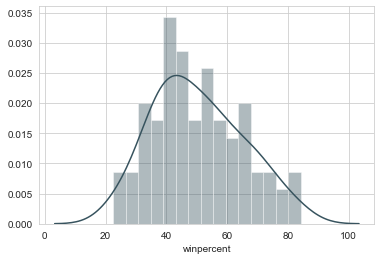

In [82]:
sns.distplot(data['winpercent'], kde=True, bins=15)
data['winpercent'].describe()

## Top 10 competitor / brands

In [83]:
# Top 10 candies
data_sort = data.sort_values(by="winpercent", ascending=False)[["competitorname", "winpercent"]] \
    .reset_index().drop("index", axis = 1)
data_sort.head(10)

,competitorname,winpercent
0,Reese's Peanut Butter cup,84.180290
1,Reese's Miniatures,81.866257
2,Twix,81.642914
3,Kit Kat,76.768600
4,Snickers,76.673782
5,Reese's pieces,73.434990
6,Milky Way,73.099556
7,Reese's stuffed with pieces,72.887901
8,Peanut butter M&M's,71.465050
9,Nestle Butterfinger,70.735641


Investigating the top 10 spots shows that Reese's has 4 candy types with a top 10 matchup win rate.
That is very significant but accordingly to FiveThirtyEight is this not surprisingly as this type of candy is quite associated with Halloween. 

## Candy Attributes

,median
chocolate,
0,41.646933
1,60.800701


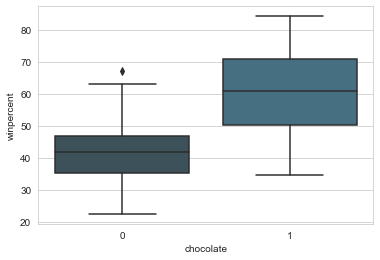

In [84]:
# chocolate
sns.boxplot(x = "chocolate", y = "winpercent", data=data)
data.groupby("chocolate")["winpercent"].agg({np.median})

,mean
fruity,
0,55.327122
1,44.119741


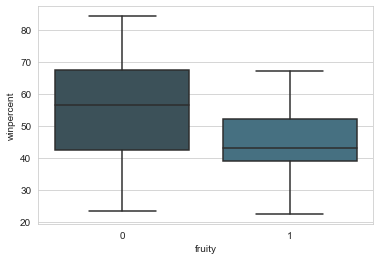

In [85]:
# fruity
sns.boxplot(x = "fruity", y = "winpercent", data=data)
data.groupby("fruity")["winpercent"].agg({np.mean})

,mean
caramel,
0,48.930538
1,57.346908


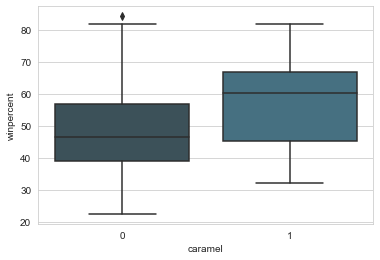

In [86]:
# caramel
sns.boxplot(x = "caramel", y = "winpercent", data=data)
data.groupby("caramel")["winpercent"].agg({np.mean})

,median
peanutyalmondy,
0,45.995827
1,70.109714


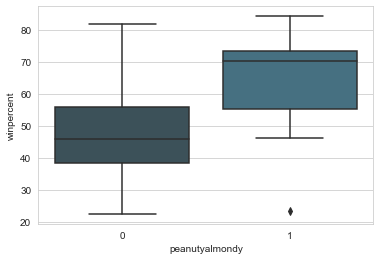

In [87]:
# peanutyalmondy
sns.boxplot(x = "peanutyalmondy", y = "winpercent", data=data)
data.groupby("peanutyalmondy")["winpercent"].agg({np.median})

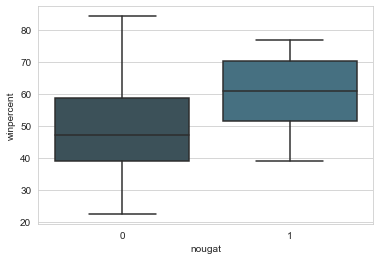

In [88]:
# nougat
sns.boxplot(x = "nougat", y = "winpercent", data=data)

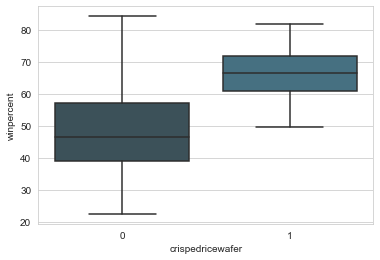

In [89]:
# crispedricewafer
sns.boxplot(x = "crispedricewafer", y = "winpercent", data=data)

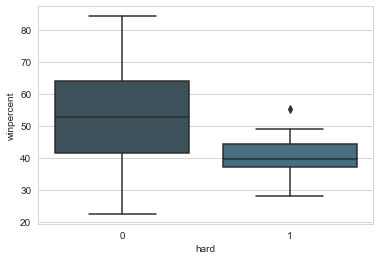

In [90]:
# hard
sns.boxplot(x = "hard", y = "winpercent", data=data)

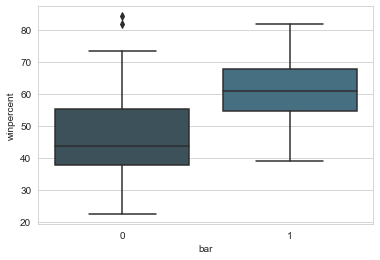

In [91]:
# bar
sns.boxplot(x = "bar", y = "winpercent", data=data)

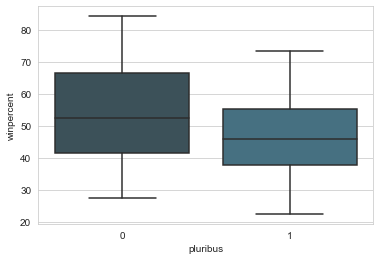

In [92]:
# pluribus
sns.boxplot(x = "pluribus", y = "winpercent", data=data)

## Top 10 candy type combinations
Regardless of the actual brand, what are the candy type combinations that drive the decision?   

In [94]:
# Get all combinations of the candy types
columns = [
        "chocolate"
        ,"fruity"
        ,"caramel"
        ,"peanutyalmondy"
        ,"nougat"
        ,"crispedricewafer"
        ,"hard"
        ,"bar"
        ,"pluribus"
       ]

candy_type_combind = []

for idx, row in data.iterrows():
    name_combind = ""

    for col in columns:
        if row[col] == 1:
            name_combind = name_combind + "_" + col 
    candy_type_combind.append(name_combind)
    
    
# Add combinations to data and filter by top10 avg win rate        
data["candy_type_combind"] = candy_type_combind
data_top10_combindation = data.groupby(["candy_type_combind"], as_index=True)['winpercent'] \
    .agg({"mean": np.mean,
          "count" : "count"}) \
    .sort_values(by="mean", ascending=False).reset_index().head(10)
    

# Add the brands to the top10 combination
candy_type_lookup = data.groupby(["candy_type_combind"]).groups
brand_decoder = {}

for idx, row in data.iterrows():
    brand_decoder[idx] = row["competitorname"] 

brand_list_top_10 = []
for idx, row in data_top10_combindation.iterrows():
    
    combination = str(row["candy_type_combind"])
    brand_list = []
    
    for brand in candy_type_lookup.get(combination):
        brand_list.append(brand_decoder.get(brand))
    
    brand_list_top_10.append(brand_list)
    
data_top10_combindation["brands"] = brand_list_top_10

# Add number of attributes
data_top10_combindation["num_att"] = data_top10_combindation["candy_type_combind"].apply(lambda x: len(x.split("_"))-1)


pd.set_option('max_colwidth', 80)
data_top10_combindation

C:\Users\dtrie\Anaconda3\envs\tfEnv\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)



,candy_type_combind,mean,count,brands,num_att
0,_chocolate_peanutyalmondy,79.644816,3,"[Reese's Miniatures, Reese's Peanut Butter cup, Reese's stuffed with pieces]",2
1,_chocolate_caramel_crispedricewafer_bar,74.307320,2,"[100 Grand, Twix]",4
2,_chocolate_peanutyalmondy_pluribus,71.461276,3,"[Peanut butter M&M's, Peanut M&Ms, Reese's pieces]",3
3,_chocolate_crispedricewafer_bar,68.507920,3,"[Hershey's Krackel, Kit Kat, Nestle Crunch]",3
4,_chocolate_caramel_nougat_bar,66.950129,2,"[Milky Way, Milky Way Midnight]",4
5,_chocolate_caramel_peanutyalmondy_nougat_bar,66.794164,2,"[Baby Ruth, Snickers]",5
6,_chocolate_caramel_bar,64.353340,1,[Milky Way Simply Caramel],3
7,_chocolate_caramel_pluribus,60.390179,2,"[Milk Duds, Rolo]",3
8,_chocolate_caramel_peanutyalmondy_crispedricewafer_bar,59.529251,1,[Snickers Crisper],5
9,_chocolate_peanutyalmondy_bar,58.536546,3,"[Almond Joy, Mr Good Bar, Nestle Butterfinger]",3


In [22]:
# sns.boxplot(x = "caramel", y = "winpercent", data=data)
data.groupby(["chocolate", "caramel"])["winpercent"].agg({np.mean})

mean
chocolate caramel           
0         0        42.744041
          1        35.522633
1         0        59.012238
          1        66.076617

Now the picture is already slightly different and gives us a good hint of which candy property drives the matchup win likelihood.

Interpreting the result:  

- The property that all top10 combinations have in common is chocolate followed by caramel. 
- All top10 brands are represented and 11 more none top10 brand.
- The best combination (chocolate and peanutyalmondy)  is just represented in the data by Resee's and it is hard to infer wheater the brand drives the decision here. 
- The second-best combination shows a top10 brand (Twix: 3) and a non top10 brand (100 Grand: 14).  



## Sugare and Price

As chocolate and caramel mix seems to have a reasonable impact winning a matchup. Let's see how much the sugur and price are related to the win percentage.

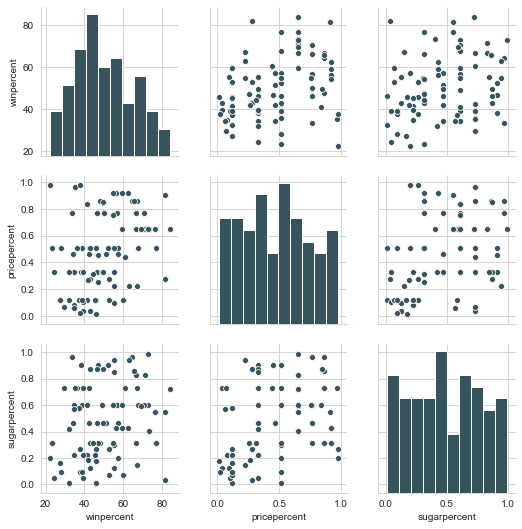

In [98]:
sns.pairplot(data[['winpercent','pricepercent', 'sugarpercent']])

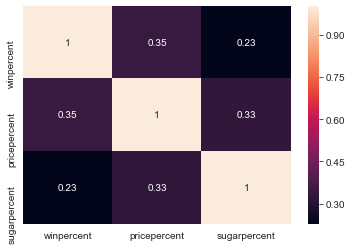

In [110]:
sns.heatmap(data[['winpercent','pricepercent', 'sugarpercent']].corr(), annot=True)

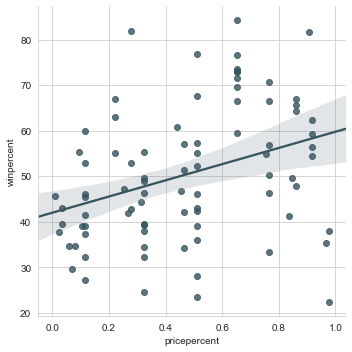

In [112]:
sns.lmplot(x='pricepercent',y='winpercent',data=data)

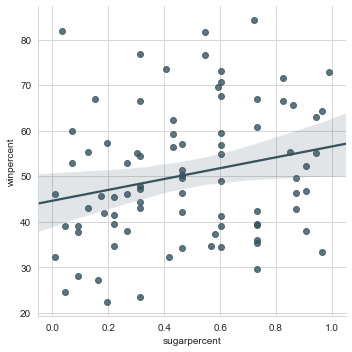

In [113]:
sns.lmplot(x='sugarpercent',y='winpercent',data=data)

Interpreting the result: 
- The impact of sugar and price on the matchup win is positive but low.     
- We can exclude them from the list of potential driving factors 
- The price however can be later used for the pricing process of the new store brand candies

# Linear Regression Model
***

**Import Functions**

In [123]:
from sklearn.linear_model import LinearRegression

**Split the data**

In [170]:
columns = [
        "chocolate"
        ,"fruity"
        ,"caramel"
        ,"peanutyalmondy"
        ,"nougat"
        ,"crispedricewafer"
        ,"hard"
        ,"bar"
        ,"pluribus"
       ]


X = data[columns]
y = data['winpercent']


**Train Model**

In [171]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Model Evaluation** 

- No prediction and residual analysis, to less data 

In [172]:
print("R² :", lm.score(X,y) )

R² : 0.5148097061389147


In [173]:
# print the intercept
print(lm.intercept_)

35.015458741530004


In [183]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values("Coefficient",ascending=False )

,Coefficient
chocolate,19.905795
fruity,10.267732
peanutyalmondy,10.141017
crispedricewafer,8.991549
caramel,3.384282
nougat,2.416252
pluribus,-0.159917
bar,-0.721966
hard,-4.872560


Interpreting the result: 

- The model can explain around 51% of the variance of the winpercentage can be expalined by the candy properties
- A candy with none of the 9 properties has a matchup win percentage of 35%  
- **Chocolate** has the highest expected win rate add about 20%  
- Add a **fruity** component or **peanuty or almondy** let the expectation increase by 10%  
- If it contain **crisped rice, wafers or a cookie** component let the win expectation increase by 9%  
- **Caramel** add just 3% and **nougat** 2%  
- **Bar** candies let win chance drop by 0.7% and if its **hard** let them drop by 5%
- If its in a **bag or box** decreases the excpected win rate by 0.15%


## Business Recommendation for a new store candy

According to the data, there are we can simplify and decide two things:
    1. Which ingredients should the new candy have? 
    2. Which form and packing should it have? 


**Ingredients**  
For the ingredient combination, we should start with **chocolate** and mix some **caramel** in. Chocolate is included in each entry of the top10 combination list and it has the highest win expectation growth. Whereby caramel is given in 6 out of 10 most liked combinations. The costomer will
Next, we can add some **peanuts, peanut butter or almonds** and it must possess **crisped rice, wafers, or a cookie** components.  
We should **avoid fruity** candy. Eventhough it has an add of 10% win percentage it also has an relatively low win expectation against non fruity candies and it is not involved in the top10 combination list.   
The sugar does not weight to much into the actual decision and the price seems also not main value driver. Never the less at least the price must be aligned with the store pricing strategy in order to avoid cannibalisation of other similar brands in the store.

**Form and packing**  
The new candy supposed to be a **not hard bar** and it is **not** one of many candies in a **bag or box**.

# Recommender Model
***

The model classifies the win percentage in 10  equaly sized classes: 1 for (0 to 10%); 2 for [10% to 20%) and so on.



columns = [
        "chocolate"
        ,"fruity"
        ,"caramel"
        ,"peanutyalmondy"
        ,"nougat"
        ,"crispedricewafer"
        ,"hard"
        ,"bar"
        ,"pluribus"
       ]


In [1]:
from candy_recommender import RecommanderModel
candy_model = RecommanderModel()

Using TensorFlow backend.


load modle from:  data/model/
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


**Compair regression result with self designed**

In [8]:
# Candy from regression
new_candy = ['chocolate', 'caramel', 'peanutyalmondy', 'crispedricewafer', 'bar']
candy_model.recommend(new_candy)

X_vec =  [[1. 0. 1. 1. 0. 1. 0. 1. 0.]]
Matchup win expectation between: 50% and 60% .


[50, 60]

In [7]:
# New idea_ add fruity
new_candy = ['chocolate'
             , 'fruity'
             , 'peanutyalmondy'
#              , 'pluribus'
#              , 'bar'
#              , 'crispedricewafer'
#              , 'hard'
            ]
candy_model.recommend(new_candy)

X_vec =  [[1. 1. 0. 1. 0. 0. 0. 0. 0.]]
Matchup win expectation between: 70% and 80% .


[70, 80]

Playing with the input variables yields to an increased win percentage expectation already

**Sear among all possible instances**  
With a prediction and search among all instacnes, the beste combination can be figuired out by simply take the highets result.

In [97]:
# Get all combinations of the attributes
import itertools 
import numpy as np
import pandas as pd

def get_all_combinations(input_list):
    combination = []
    a = input_list
    for L in range(len(a) +1):
        for subset in itertools.combinations(a, L):
            #print(subset)
            combination.append(subset)
    return combination


attr_candy = new_candy = ['chocolate'
                         , 'fruity'
                         , 'peanutyalmondy'
                         , 'pluribus'
                         , 'bar'
                         , 'crispedricewafer'
                         , 'hard']
combination_list = get_all_combinations(attr_candy)

# Create a result df
data_result = pd.DataFrame({'combination' : combination_list,
                            'result' : np.zeros(len(combination_list))})

# Get predictions and store result in dictionary:
result_list = []

for combination in combination_list:
    
    print("Run for combination : ", combination)
    result = candy_model.recommend(combination) 
    
    result_list.append(str(result))
    print("\r")

data_result["result"] = result_list

Run for combination :  ()
X_vec =  [[0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Matchup win expectation between: 30% and 40% .

Run for combination :  ('chocolate',)
X_vec =  [[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Matchup win expectation between: 40% and 50% .

Run for combination :  ('fruity',)
X_vec =  [[0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Matchup win expectation between: 50% and 60% .

Run for combination :  ('peanutyalmondy',)
X_vec =  [[0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Matchup win expectation between: 40% and 50% .

Run for combination :  ('pluribus',)
X_vec =  [[0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Matchup win expectation between: 30% and 40% .

Run for combination :  ('bar',)
X_vec =  [[0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Matchup win expectation between: 30% and 40% .

Run for combination :  ('crispedricewafer',)
X_vec =  [[0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Matchup win expectation between: 30% and 40% .

Run for combination :  ('hard',)
X_vec =  [[0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Matchup win expectation between: 30% and 40% .

Run for

In [98]:
# Overview of combination performance
data_result.groupby('result').count()

,combination
result,
"[20, 30]",5
"[30, 40]",36
"[40, 50]",18
"[50, 60]",29
"[60, 70]",28
"[70, 80]",10
"[80, 90]",2


We can see that there are two combination with an highest prediction class [80, 90]

In [99]:
# Get the two best inputs:
idxs = np.where(np.array(result_list) == '[80, 90]')[0]
data_result.iloc[idxs,:]

,combination,result
9,"(chocolate, peanutyalmondy)","[80, 90]"
67,"(chocolate, fruity, peanutyalmondy, hard)","[80, 90]"


In [100]:
# get the second best classes:
pd.set_option('max_colwidth', 80)
idxs = np.where(np.array(result_list) == '[70, 80]')[0]
data_result.iloc[idxs,:]

,combination,result
8,"(chocolate, fruity)","[70, 80]"
29,"(chocolate, fruity, peanutyalmondy)","[70, 80]"
32,"(chocolate, fruity, crispedricewafer)","[70, 80]"
36,"(chocolate, peanutyalmondy, crispedricewafer)","[70, 80]"
64,"(chocolate, fruity, peanutyalmondy, pluribus)","[70, 80]"
66,"(chocolate, fruity, peanutyalmondy, crispedricewafer)","[70, 80]"
71,"(chocolate, fruity, bar, crispedricewafer)","[70, 80]"
100,"(chocolate, fruity, peanutyalmondy, pluribus, crispedricewafer)","[70, 80]"
120,"(chocolate, fruity, peanutyalmondy, pluribus, bar, crispedricewafer)","[70, 80]"
122,"(chocolate, fruity, peanutyalmondy, pluribus, crispedricewafer, hard)","[70, 80]"


Those lists can be disscussed with the managemnt regarding potential new candy. There are much more elements part of the decision than just the preference of a candy e.g. already excisting, canibalisation or production cost. 

# Ende